<a href="https://colab.research.google.com/github/Wedsanley/Final-Project/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Determine the profile of women according to the number of children given birth or desired.

2. Estimate the number of children a woman will have before menopause.

3. Realise a logistic regression to predict if a young woman is susceptiblle to get pregnant.

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

The number of children depends on the the place of residence, the age at first birth, the educational level...., What are the factors which influence the fertility in Haiti?



# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


The data from EMMUS (survey, mortality, morbidity and service utilization)

# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

### Libraries

In [213]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
"""from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px"""
from scipy import stats

### Data Import

In [214]:
reprod = pd.read_csv("/content/drive/MyDrive/Project/final_data.csv")

### Data Comprehension

In [215]:
a = reprod.shape
print(f"The data has {a[0]} observations and {a[1]} variables.")

The data has 15513 observations and 30 variables.


In [216]:
reprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Current age                                                     15513 non-null  int64  
 1   Age in 5-year groups                                            15513 non-null  object 
 2   Region                                                          15513 non-null  object 
 3   Place of residence                                              15513 non-null  object 
 4   Highest educational level                                       15513 non-null  object 
 5   Religion                                                        15513 non-null  object 
 6   Wealth index combined                                           15513 non-null  object 
 7   Total children ever born                         

#### variable meaning

**Case Identification**: Unique values identifying each observations

**Current age**: The age of the respondent                                                     
**Age in 5-year groups**: The age froup of the respondent 
                                             
**Region**: The departement of residence
                                            
**Place of residence**: Wheter the respondent live in urban or rural area

**Years lived in place of residence**: Years passed in residence area   
                                                        
**Religion**: The faith of the respondents                                                            
**Educational attainment**: The highest of the respondent  

**Wealth index combined**: The socio-economic classification for each respondent

**Total children ever born**: Total of born children for each woman

**Sons who have died**: Number of sons died

**Daughters who have died**: Number of daughters died  

**Age at 1st birth**: Age of the respondent when she has her firts child

**Currently pregnant**: Wheter the respondent is pregnant or not   

**Time since last menstrual period**: Time passed since the last menstruations

**Knowledge of ovulatory cycle**: Wheter the respondent knows the ovulatory cycle 

**Number of living children**: The number of children in life for each respondent

**Last birth to interview (months**: The number of time passed since the last birth

**Knowledge of any method**: Wheter the  respondent knows the contraceptive method

**Ever used anything or tried to delay or avoid getting pregnant**: Wheter the  respondent tries to avoid to get pregnant

**Current contraceptive method**: Which method method is uded by the respondent

**Age at sterilization**: The age when the respondent stop to ovulate or she decide to not get pregnant anymore

**Wanted last child**: Wheter the respondent want the last child or not

**Currently amenorrheic**: If the respondent is amenorrheic

**Current marital status**: The marital status of the respondent

**Age at first sex**: The age of the respondent when she had sex for the first time

**Ever been married or in union**: Wheter the respondent have been in union or not
                                              
**Fertility preference**: If the respondent want to have another child

**Preferred waiting time for birth of a/another child**: The number of time before the next child

**Desire for more children**: Desire to have more children

**Ideal number of children (grouped)**: The number of children the the respondent think is good

**Unmet need for contraception (definition )**: Reason for not using contraception

**Respondent currently working**: Wheter the respondent works or not

**Respondent's occupation**: The occupation of the respondent

**Husband/partner's educational attainment**: Husband/partner's educational attainment for each respondent

**Husband/partner's age**: The age of the respondent of each respondent

**Total lifetime number of sex partners**: The number of sex partners of the respondent

**Respondent can refuse sex**: Wheter the respondent can refuse sex or not

**NA - First sex was wanted or forced**: Wheter the firstb sex was wanted or not                              


In [267]:
# verifying null values
reprod.isnull().sum()

Current age                                                           0
Age in 5-year groups                                                  0
Region                                                                0
Place of residence                                                    0
Highest educational level                                             0
Religion                                                              0
Wealth index combined                                                 0
Total children ever born                                           1142
Sons who have died                                                 1142
Daughters who have died                                            1142
Age at first birth                                                 6906
Currently pregnant                                                 1142
Time since last menstrual period                                   1142
Knowledge of ovulatory cycle                                    

In [218]:
reprod

,Current age,Age in 5-year groups,Region,Place of residence,Highest educational level,Religion,Wealth index combined,Total children ever born,Sons who have died,Daughters who have died,Age at first birth,Currently pregnant,Time since last menstrual period,Knowledge of ovulatory cycle,Number of living children,Knowledge of any method,Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Wanted last child,Currently amenorrheic,Current marital status,Age at first sex,Ever been married or in union,Fertility preference,Ideal number of children,Ideal number of children (grouped),Unmet need for contraception (definition 3),Respondent currently working,Total lifetime number of sex partners,Respondent can refuse sex
0,18,15-19,Sud,Rural,Secondary,Protestant,Middle,0.0,0.0,0.0,NaN,No or unsure,102,After period ended,0.0,Knows modern method,No,Not using,NaN,No,Never in union,Not had sex,No,Have another,3,3,Never had sex,No,NaN,NaN
1,28,25-29,Sud,Rural,Secondary,Catholic,Poorest,0.0,0.0,0.0,NaN,Yes,304,Middle of the cycle,0.0,Knows modern method,No,Not using,NaN,No,Never in union,25,No,Have another,2,2,Unmet need for spacing,No,2,NaN
2,18,15-19,Sud,Rural,Primary,Catholic,Poorest,0.0,0.0,0.0,NaN,No or unsure,108,After period ended,0.0,Knows modern method,No,Not using,NaN,No,Never in union,17,No,Have another,3,3,Not married and no sex in last 30 days,No,1,NaN
3,33,30-34,Sud,Rural,Secondary,Protestant,Richer,1.0,0.0,0.0,33.0,No or unsure,302,Middle of the cycle,1.0,Knows modern method,No,Not using,Wanted then,No,Married,22,NaN,Have another,3,3,Unmet need for spacing,Yes,3,NaN
4,28,25-29,Sud,Rural,Secondary,Protestant,Richer,0.0,0.0,0.0,NaN,No or unsure,122,Middle of the cycle,0.0,Knows modern method,No,Not using,NaN,No,Married,25,NaN,Have another,3,3,No unmet need,No,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,58,50+,Aire Metropolitaine,Urban,Primary,Protestant,Richest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15509,26,25-29,Aire Metropolitaine,Urban,Higher,Protestant,Richest,0.0,0.0,0.0,NaN,No or unsure,104,Middle of the cycle,0.0,Knows modern method,No,Not using,NaN,No,Never in union,Not had sex,No,Have another,1,1,Never had sex,No,NaN,NaN
15510,34,30-34,Aire Metropolitaine,Urban,Higher,Protestant,Richest,0.0,0.0,0.0,NaN,No or unsure,102,After period ended,0.0,Knows modern method,No,Not using,NaN,No,Never in union,Not had sex,No,Have another,1,1,Never had sex,Yes,NaN,NaN
15511,34,30-34,Aire Metropolitaine,Urban,Higher,Protestant,Richest,0.0,0.0,0.0,NaN,No or unsure,203,After period ended,0.0,Knows modern method,No,Not using,NaN,No,Never in union,Not had sex,No,Have another,1,1,Never had sex,No,NaN,NaN


In [219]:
reprod['Ideal number of children'].replace({"Non-numeric response": np.nan}, inplace=True)

In [220]:
reprod['Ideal number of children']=reprod['Ideal number of children'].astype('float')

In [221]:
"""Les femmes sont considérées comme ayant atteint la ménopause si elles ne 
sont ni enceintes, ni en aménorrhée post-partum et si elles n’ont pas eu de 
règles pendant une période de six mois avant l’enquête, ou si elles déclarent 
qu’elles sont en ménopause ou qu’elles ont eu une hystérectomie, ou si elles 
n’ont jamais eu de règles."""

'Les femmes sont considérées comme ayant atteint la ménopause si elles ne \nsont ni enceintes, ni en aménorrhée post-partum et si elles n’ont pas eu de \nrègles pendant une période de six mois avant l’enquête, ou si elles déclarent \nqu’elles sont en ménopause ou qu’elles ont eu une hystérectomie, ou si elles \nn’ont jamais eu de règles.'

In [222]:
reprod["Having sex"] = reprod["Age at first sex"].apply(lambda x: "No" if x=="Not had sex" else "Yes")
reprod["Knowing ovulatory cycle"] = reprod["Knowledge of ovulatory cycle"].apply(lambda x: "Yes" if x=="Before period begins" else "No")
reprod["Using method"] = reprod["Current contraceptive method"].apply(lambda x: "No" if x=="Not using" else "Yes")
reprod_hc = reprod[reprod['Total children ever born']>=1]
reprod_prec = reprod_hc[reprod_hc["Age in 5-year groups"]=="15-19"]
pop_15_19 = reprod[reprod["Age in 5-year groups"]=="15-19"]
pop_15_19["Early pregnancy"] = None
pop_15_19["Early pregnancy"] = pop_15_19["Currently pregnant"].apply(lambda x: "Yes" if x=="Yes" else "No")
pop_15_19["Early pregnancy"] = pop_15_19["Total children ever born"].apply(lambda x: "Yes" if x>=1.0 else "No")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [223]:
l = reprod_hc["Time since last menstrual period"].to_list()
l4 = [x for x in l if str(x)[0]=="4"]
l3 = [x for x in l if str(x)[0]=="3" ]
l3 = [str(x) for x in l3 if int(x)>305]
l5 = ["Never menstruated", 'In menopause/had hysterectomy']
menopause_list = l4+l3+l5
menopause = reprod_hc[reprod_hc["Time since last menstrual period"].isin(menopause_list)]

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

## Building functions for the Analysis

In [224]:
"""def label_function(val):
    return f'{val / 100 * len(reprod):.0f}\n{val:.0f}%'"""

def plotsubs(data = reprod, col1 = "", col2 = "", kind1 = "", kind2="", hue=''):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  df = data.groupby(col1).size()
  df.plot(kind=kind1, textprops={'fontsize': 10}, ax=ax1)
  #reprod.groupby(col2).size().plot(kind= kind2, autopct=label_function, textprops={'fontsize': 10}, ax=ax2)
  if hue=='yes':
    sns.countplot(data=data, y=col2,ax=ax2, hue = col1, palette = "Set2")
  else:
    sns.countplot(data=data, y=col2, ax=ax2, palette = "Set2")
  ax1.set_ylabel(f'Per {col1}', size=22)
  ax2.set_ylabel(f'Per {col2}', size=22)
  plt.tight_layout()
  plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)
  plt.show()

def chartrelation(data = reprod, col1 = "", col2 = "", test = False):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  tab = pd.crosstab(data[col1], data[col2])
  sns.countplot(data=data, y=col1 ,ax=ax1, palette = "Set2")
  tab.plot(kind="bar", ax=ax2)
  plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)
  
  if test is True:
    stat, p, dof, expected = stats.chi2_contingency(tab)
    if p > 0.05:
      print(f"{col1} and {col2} are Probably independent with a significance level of 5%.")
    else:
      print(f"{col1} and {col2} are Probably Dependent with a significance level of 5%.")
  return tab

def numplot(data = reprod, col1 = "", col2 = "", test = False, kde = False ):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
  ax1.set_title(f"Distribution of {col1} of the respondents", fontsize=18)
  ax1.set_xlabel(f"{col1}", fontsize=16)
  ax1.set_ylabel('Frequency', fontsize=16)
  if kde is True:
    sns.histplot(data[col1], kde=1, bins=20, ax = ax1, palette = "Set2")
  else:
    sns.histplot(data[col1], bins=20, ax = ax1, palette = "Set2")
  sns.boxplot(data=data, x=col1, y=col2, ax=ax2, palette = "Set2" )
  ax2.set_title(f"Distribution of {col1} by {col2}", fontsize=18)
  ax2.set_xlabel(f"{col1}", fontsize=16)
  ax2.set_ylabel(f"{col2}", fontsize=16)
  plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)
  plt.show
  if test is True:
    a = stats.jarque_bera(data[col1])
    if a[1]<0.5:
      print(f"The corresponding p-value is {a[1]}. The p-value is less than 0.05, we reject the null hypothesis. \nNow we have sufficient evidence to say that this data has skewness and kurtosis which is different \nfrom a normal distribution.")
    else:
      print(f"The corresponding p-value is {a[1]}. The p-value is less than 0.05, we can reject the null hypothesis. \nNow we don't have sufficient evidence to say that this data has skewness and kurtosis which is different \nfrom a normal distribution.") 


def meanfilter(data = reprod_hc, xfilter = 'Highest educational level', ynum1 = 'Total children ever born', ynum2 = 'Ideal number of children', meanfil1="Mean number of children", meanfil2='Ideal mean number of children'):
  b = data.groupby([xfilter]).agg({ynum1: 'sum'})
  c = data.groupby([xfilter]).agg({ynum2: 'sum'})
  a = pd.concat([c,b], axis=1)
  a[meanfil1] = a[ynum1].apply(lambda x: x/len(data[data[xfilter]==a[a[ynum1]==x].index[0]]))
  a[meanfil2] = a[ynum2].apply(lambda x: x/len(data[data[xfilter]==a[a[ynum2]==x].index[0]]))
  a.sort_values(meanfil1, inplace=True)
  j = a.iloc[:, 2:]
  d = j.reset_index()
  d = d.melt(xfilter, var_name='cols',  value_name='vals')
  ax = sns.pointplot(x=xfilter, y="vals", hue='cols', data=d, palette="Set2", figsize=(10,6))
  plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)
  return j

def createdf(data, x=""):
  a = data[x].value_counts().to_frame()
  a["Frequence"] = a[x]/data.shape[0]
  return a

In [225]:
reprod.groupby("Currently pregnant").size().to_list()[0]

13635

## Socio-Demographic variables

Graphic #1


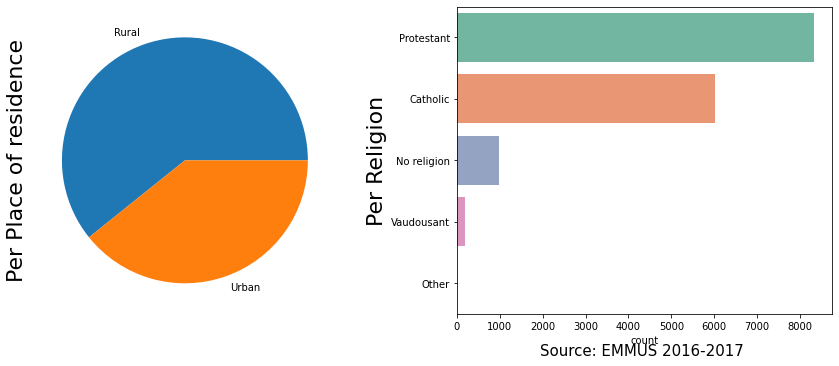

In [226]:
print("Graphic #1")
plotsubs(col1 = "Place of residence", col2 = "Religion", kind1="pie", kind2="pie")

Graphic #2


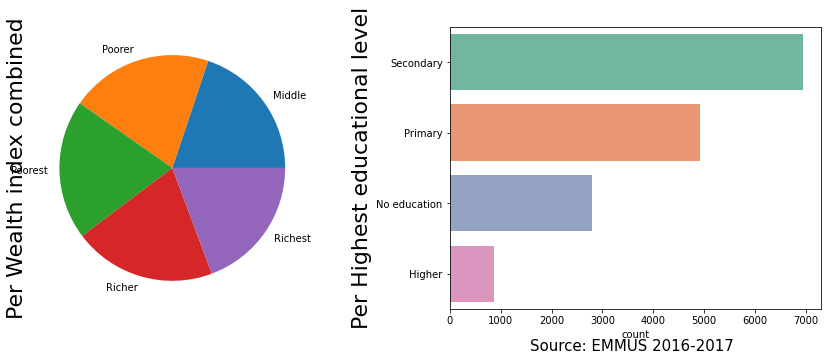

In [227]:
print("Graphic #2")
plotsubs(col1 = "Wealth index combined", col2 = "Highest educational level", kind1="pie", kind2="pie")

Graphic #3


Place of residence,Rural,Urban
Region,,
Aire Metropolitaine,0,2198
Artibonite,1144,752
Centre,944,268
Grand'Anse,719,309
Nippes,831,138
Nord,848,705
Nord-Est,641,537
Nord-Ouest,1101,460
Rest-Ouest,1256,238


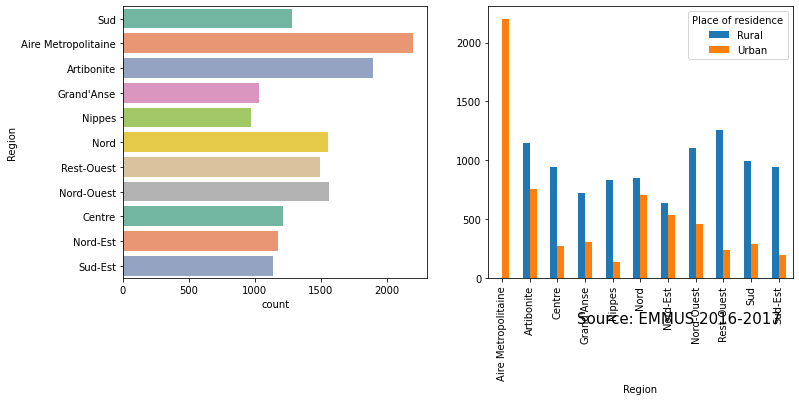

In [228]:
print("Graphic #3")
chartrelation(test="Yes", col1="Region", col2="Place of residence")

Graphic #4


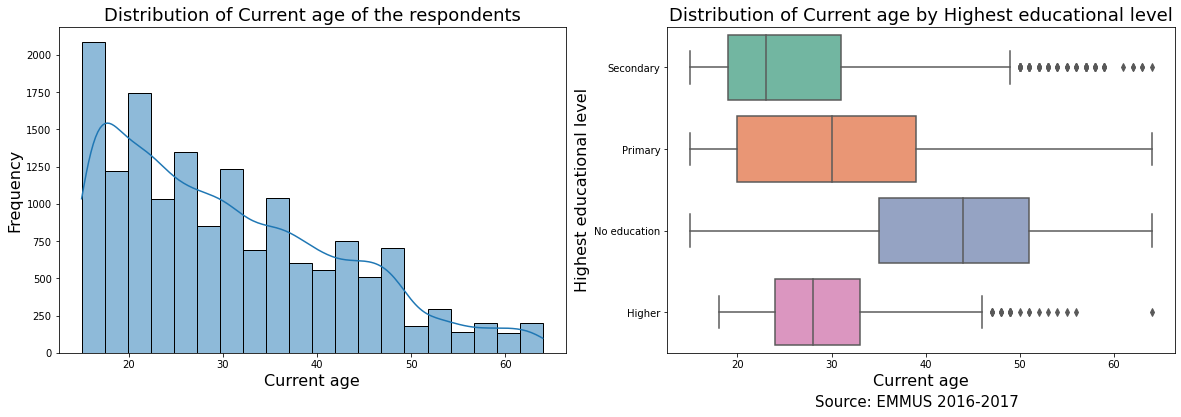

In [229]:
print("Graphic #4")
numplot(data=reprod, col1 ="Current age", col2="Highest educational level", kde = True)

Graphic #5


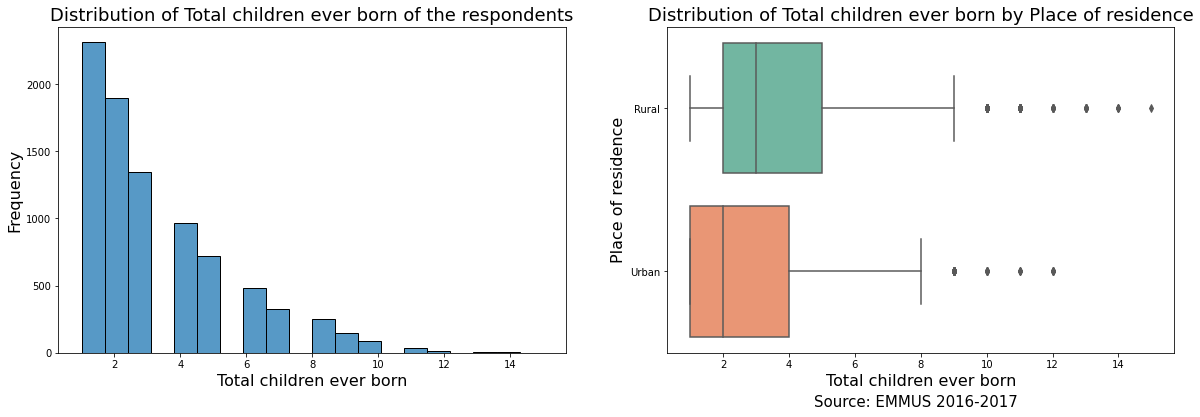

In [230]:
print("Graphic #5")
numplot(data=reprod_hc, col1 ="Total children ever born", col2="Place of residence")

Graphic #6


Text(0.65, 0.0001, 'Source: EMMUS 2016-2017')

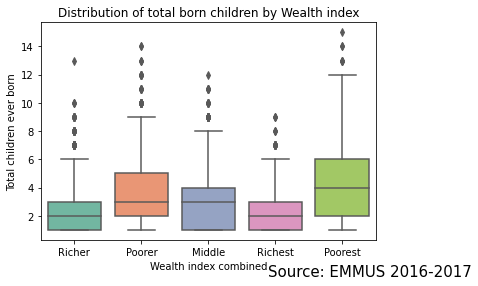

In [231]:
print("Graphic #6")
sns.boxplot(data=reprod_hc, x="Wealth index combined", y="Total children ever born", palette = "Set2")
plt.title("Distribution of total born children by Wealth index")
plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)

Graphic #7
The corresponding p-value is 0.0. The p-value is less than 0.05, we reject the null hypothesis. 
Now we have sufficient evidence to say that this data has skewness and kurtosis which is different 
from a normal distribution.


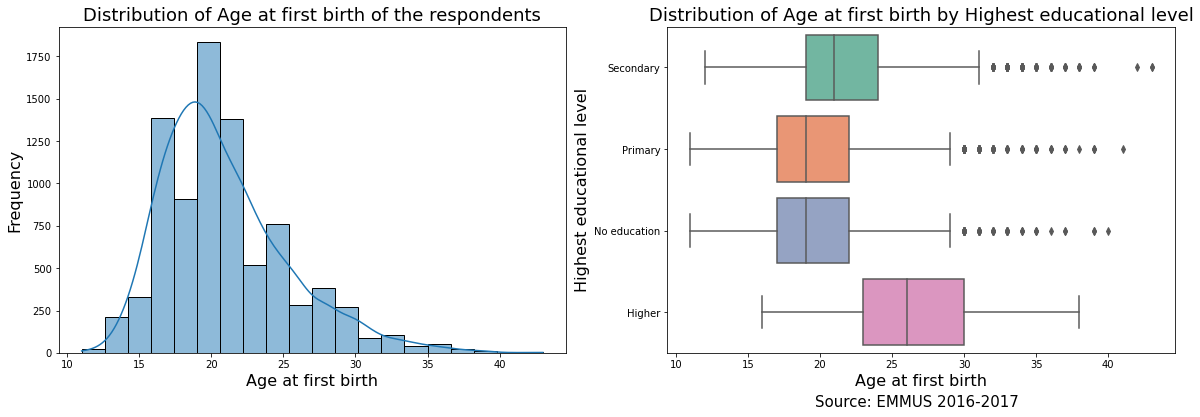

In [232]:
print("Graphic #7")
numplot(data=reprod_hc, col1 ="Age at first birth", col2="Highest educational level", kde=True, test=True)

In [272]:
createdf(data = reprod_hc, x="Respondent currently working")

,Respondent currently working,Frequence
Yes,5064,0.588358
No,3543,0.411642


In [276]:
#meanfilter(data = reprod_hc, xfilter = 'Respondent currently working')

Graphic #8


,Mean number of children,Ideal mean number of children
Highest educational level,,
Higher,1.674497,2.785235
Secondary,2.079050,2.798959
Primary,3.413174,3.085030
No education,5.023219,3.508179


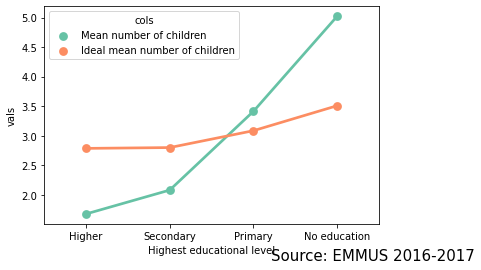

In [233]:
print("Graphic #8")
meanfilter()

Graphic #9


,Mean number of children,Ideal mean number of children
Age in 5-year groups,,
15-19,1.131206,2.429078
20-24,1.495098,2.614379
25-29,2.106383,2.797550
30-34,2.850985,3.002463
35-39,3.778802,3.212640
40-44,4.668016,3.398381
45-49,5.339590,3.591297


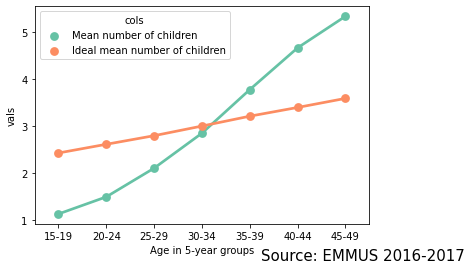

In [234]:
print("Graphic #9")
meanfilter(data = reprod_hc, xfilter = 'Age in 5-year groups')


Graphic #10


,Mean number of children,Ideal mean number of children
Wealth index combined,,
Richest,2.194527,2.906805
Richer,2.632963,2.915839
Middle,3.107082,2.898584
Poorer,3.748045,3.190503
Poorest,4.094520,3.338361


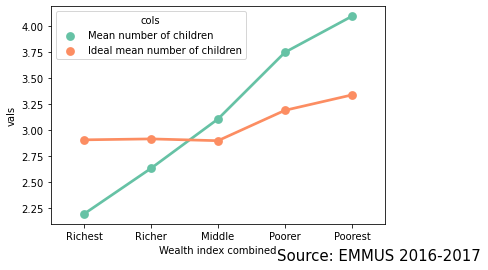

In [235]:
print("Graphic #10")
meanfilter(xfilter='Wealth index combined')

In [236]:
createdf(data=reprod_hc, x="Wanted last child")

,Wanted last child,Frequence
Wanted then,2083,0.242012
Wanted later,1615,0.187638
Wanted no more,1307,0.151853


## Knowledge of ovulatory cycle and contraceptive methods

In [237]:
len(reprod_hc)

8607

In [238]:
createdf(data=reprod_hc, x="Knowledge of any method")

,Knowledge of any method,Frequence
Knows modern method,8604,0.999651
Knows no method,2,0.000232
Knows only traditional method,1,0.000116


In [239]:
createdf(data=reprod_hc, x="Using method")

,Using method,Frequence
No,5798,0.673638
Yes,2809,0.326362


Graphic #11


Text(0.65, 0.0001, 'Source: EMMUS 2016-2017')

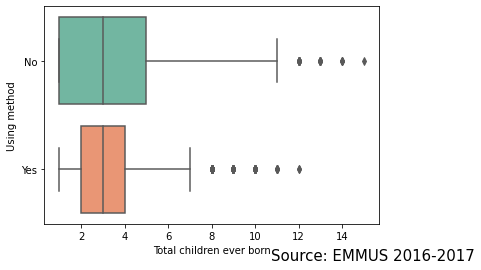

In [240]:
print("Graphic #11")
sns.boxplot(data=reprod_hc, x= "Total children ever born", y= "Using method", palette = "Set2" )
plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)

In [241]:
createdf(data=reprod_hc, x="Knowing ovulatory cycle")

,Knowing ovulatory cycle,Frequence
No,7714,0.896247
Yes,893,0.103753


Graphic #12


Text(0.65, 0.0001, 'Source: EMMUS 2016-2017')

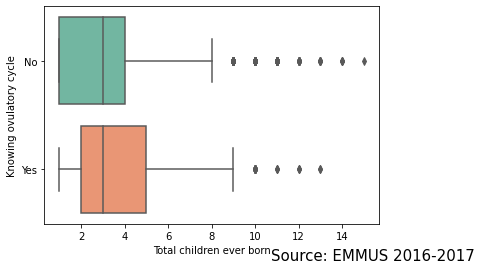

In [242]:
print("Graphic #12")
sns.boxplot(data=reprod_hc, x= "Total children ever born", y= "Knowing ovulatory cycle", palette = "Set2" )
plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)

## Early pregnancy

It consists of young woman having one or more children or being pregnant in the time of the survey.

In [243]:
print(f"The number of women grouped in 15-19 years is {len(pop_15_19)}.")

The number of women grouped in 15-19 years is 3307.


In [284]:
reprod_prec = pop_15_19[pop_15_19["Early pregnancy"]=="Yes"]
createdf(data=pop_15_19, x="Early pregnancy")
reprod_prec

,Current age,Age in 5-year groups,Region,Place of residence,Highest educational level,Religion,Wealth index combined,Total children ever born,Sons who have died,Daughters who have died,Age at first birth,Currently pregnant,Time since last menstrual period,Knowledge of ovulatory cycle,Number of living children,Knowledge of any method,Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Wanted last child,Currently amenorrheic,Current marital status,Age at first sex,Ever been married or in union,Fertility preference,Ideal number of children,Ideal number of children (grouped),Unmet need for contraception (definition 3),Respondent currently working,Total lifetime number of sex partners,Respondent can refuse sex,Having sex,Knowing ovulatory cycle,Using method,Early pregnancy
154,19,15-19,Nippes,Rural,Primary,Protestant,Middle,1.0,0.0,0.0,15.0,No or unsure,Years: 1,After period ended,1.0,Knows modern method,"Yes, used in calendar",Injections,Wanted later,No,Married,14,NaN,No more,2.0,2,Using for limiting,No,1,NaN,Yes,No,Yes,Yes
254,19,15-19,Nord,Rural,Secondary,Protestant,Poorest,1.0,0.0,0.0,18.0,No or unsure,117,At any time,1.0,Knows modern method,"Yes, used in calendar",Pill,Wanted later,No,Married,16,NaN,Have another,3.0,3,Using for spacing,Yes,1,Yes,Yes,No,Yes,Yes
256,19,15-19,Nord,Rural,Primary,Catholic,Poorest,1.0,0.0,0.0,16.0,Yes,303,Middle of the cycle,1.0,Knows modern method,"Yes, used outside calendar",Not using,Wanted then,No,Married,16,NaN,Have another,4.0,4,No unmet need,No,1,NaN,Yes,No,No,Yes
284,18,15-19,Rest-Ouest,Rural,Primary,Protestant,Poorer,1.0,0.0,0.0,16.0,No or unsure,302,After period ended,1.0,Knows modern method,No,Not using,Wanted then,No,Never in union,13,No,Have another,2.0,2,Not married and no sex in last 30 days,Yes,2,NaN,Yes,No,No,Yes
336,19,15-19,Artibonite,Rural,Primary,Protestant,Poorest,1.0,0.0,0.0,16.0,No or unsure,129,After period ended,1.0,Knows modern method,"Yes, used in calendar",Injections,Wanted later,No,Married,13,NaN,Have another,2.0,2,Using for spacing,No,1,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15187,18,15-19,Grand'Anse,Rural,Primary,Catholic,Poorest,1.0,0.0,0.0,16.0,No or unsure,Before last birth,After period ended,1.0,Knows modern method,"Yes, used outside calendar",Not using,Wanted no more,Yes,Married,15,NaN,Have another,4.0,4,Unmet need for limiting,Yes,2,Yes,Yes,No,No,Yes
15216,19,15-19,Sud,Rural,Secondary,Protestant,Poorer,1.0,0.0,0.0,18.0,No or unsure,111,During her period,1.0,Knows modern method,No,Not using,Wanted later,No,Never in union,16,No,No more,3.0,3,Not married and no sex in last 30 days,No,1,NaN,Yes,No,No,Yes
15226,18,15-19,Sud,Rural,Primary,Catholic,Poorer,1.0,0.0,0.0,17.0,No or unsure,203,Middle of the cycle,1.0,Knows modern method,No,Not using,Wanted then,No,Married,14,NaN,Have another,2.0,2,Unmet need for spacing,No,2,Yes,Yes,No,No,Yes
15262,19,15-19,Nord-Est,Rural,Primary,Catholic,Poorer,2.0,0.0,0.0,17.0,No or unsure,108,After period ended,2.0,Knows modern method,"Yes, used in calendar",Injections,Wanted later,No,Married,15,NaN,Have another,4.0,4,Using for spacing,Yes,2,Yes,Yes,No,Yes,Yes


Graphic #13
Wealth index combined and Early pregnancy are Probably Dependent with a significance level of 5%.


Early pregnancy,No,Yes
Wealth index combined,,
Middle,607,60
Poorer,658,67
Poorest,585,96
Richer,618,40
Richest,557,19


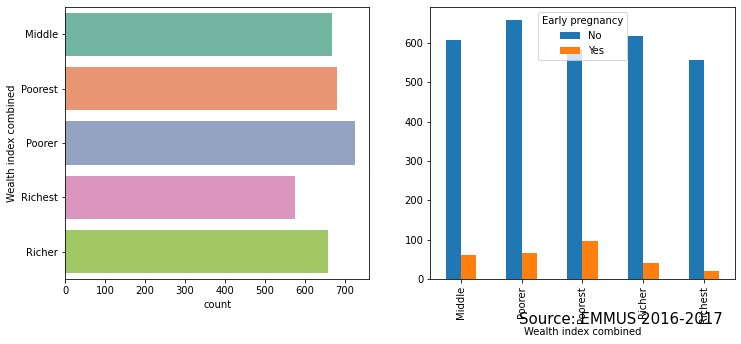

In [245]:
print("Graphic #13")
chartrelation(test=True, col1="Wealth index combined", col2="Early pregnancy", data=pop_15_19)

In [246]:
createdf(data=pop_15_19, x="Region")

,Region,Frequence
Artibonite,392,0.118536
Aire Metropolitaine,376,0.113698
Nord-Ouest,336,0.101603
Rest-Ouest,320,0.096764
Nord,320,0.096764
Nord-Est,308,0.093136
Sud,292,0.088298
Centre,269,0.081343
Sud-Est,265,0.080133
Grand'Anse,233,0.070457


Graphic #14
Place of residence and Early pregnancy are Probably Dependent with a significance level of 5%.


Early pregnancy,No,Yes
Place of residence,,
Rural,1852,202
Urban,1173,80


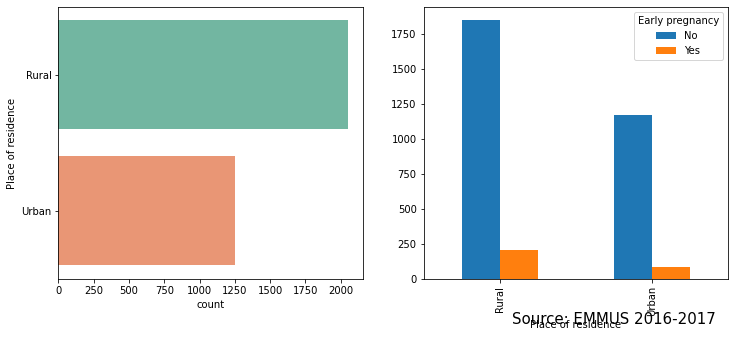

In [247]:
print("Graphic #14")
chartrelation(test=True, col1="Place of residence", col2="Early pregnancy", data=pop_15_19)

Graphic #15
Highest educational level and Early pregnancy are Probably Dependent with a significance level of 5%.


Early pregnancy,No,Yes
Highest educational level,,
Higher,16,0
No education,43,15
Primary,965,162
Secondary,2001,105


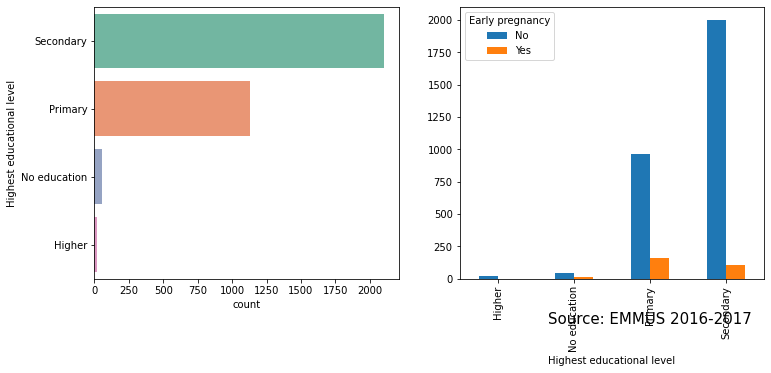

In [248]:
print("Graphic #15")
chartrelation(test=True, col1="Highest educational level" ,col2="Early pregnancy", data=pop_15_19)

In [249]:
reprod_sex = reprod_hc[reprod_hc["Having sex"]=="Yes"]
reprod_sex["Mean age sex"] = reprod_sex["Age at first sex"].apply(lambda x: int(x))
reprod_sex = reprod_sex[reprod_sex["Mean age sex"]<20]
c = reprod_sex.groupby(["Age in 5-year groups"]).agg({"Mean age sex": 'mean'})
c

,Mean age sex
Age in 5-year groups,
15-19,14.379433
20-24,15.775614
25-29,16.029971
30-34,16.117692
35-39,16.028053
40-44,16.132984
45-49,16.198857


Graphic #16


Text(0.65, 0.0001, 'Source: EMMUS 2016-2017')

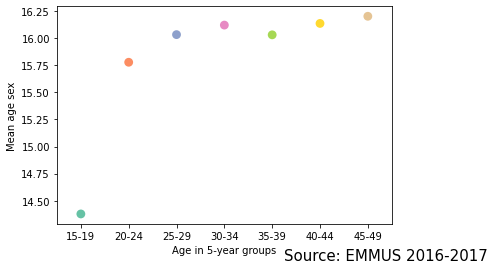

In [250]:
print("Graphic #16")
ax = sns.pointplot(data = c.reset_index(), x="Age in 5-year groups", y="Mean age sex", kind= "point", palette="Set2", figsize=(10,5))
plt.figtext(0.65, 0.0001, "Source: EMMUS 2016-2017", fontsize=15)

In [288]:
reprod_prec.groupby(["Place of residence", "Highest educational level"])["Early pregnancy"].count().to_frame()

Early pregnancy
Place of residence Highest educational level                 
Rural              No education                            13
                   Primary                                125
                   Secondary                               64
Urban              No education                             2
                   Primary                                 37
                   Secondary                               41

In [289]:
reprod_prec.groupby(["Place of residence", "Wealth index combined"])["Early pregnancy"].count().to_frame()

Early pregnancy
Place of residence Wealth index combined                 
Rural              Middle                              31
                   Poorer                              60
                   Poorest                             92
                   Richer                              14
                   Richest                              5
Urban              Middle                              29
                   Poorer                               7
                   Poorest                              4
                   Richer                              26
                   Richest                             14

In [292]:
reprod_prec.groupby(["Having sex", "Knowing ovulatory cycle",	"Using method"])["Early pregnancy"].count().to_frame()

Early pregnancy
Having sex Knowing ovulatory cycle Using method                 
Yes        No                      No                        182
                                   Yes                        62
           Yes                     No                         29
                                   Yes                         9

## Menopausal women

In [251]:
all = len(reprod)
mnopoz = len(menopause)
freq = round((mnopoz/all)*100, 2)
print(f"The number of women in menopause are {mnopoz}.")
print(f"They represent {freq}% of the total respondents.")

The number of women in menopause are 1144.
They represent 7.37% of the total respondents.


In [252]:
menopause["Menopause"] = "Yes"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
Age_mean = menopause["Current age"].mean()
print(f"The mean age at menopause is {round(Age_mean)} years.")

The mean age at menopause is 37 years.


Graphic #17
The corresponding p-value is 0.0. The p-value is less than 0.05, we reject the null hypothesis. 
Now we have sufficient evidence to say that this data has skewness and kurtosis which is different 
from a normal distribution.


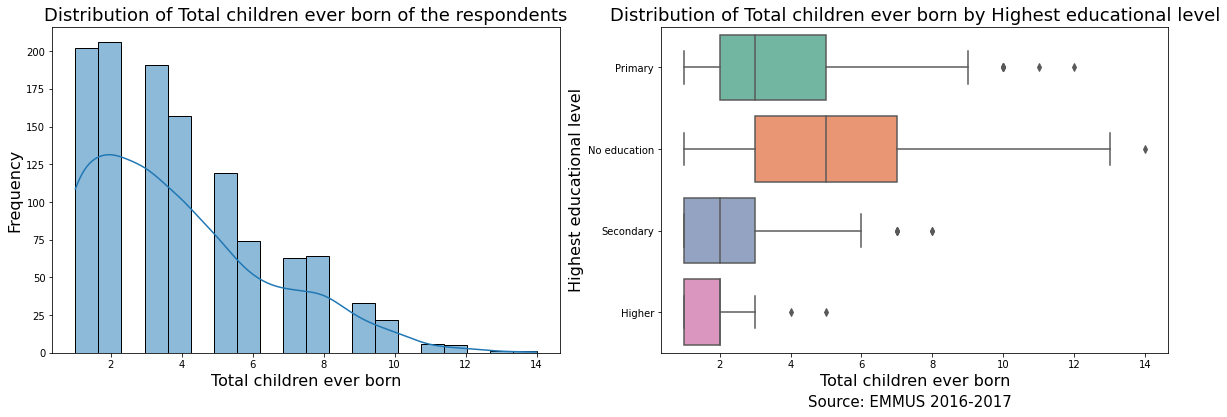

In [254]:
print("Graphic #17")
numplot(data=menopause, col1 ="Total children ever born", col2="Highest educational level", kde=True, test=True)

In [255]:
f = menopause["Total children ever born"].mean()
print(f"The mean number of children by womwn in menopause is {round(f, 2)}.")

The mean number of children by womwn in menopause is 3.91.


Graphic #18


,Mean number of children,Ideal mean number of children
Wealth index combined,,
Richest,2.718310,3.246479
Richer,3.079096,2.870056
Middle,3.544000,3.000000
Poorer,4.443548,3.326613
Poorest,4.764526,3.437309


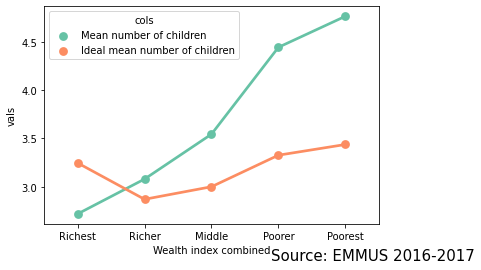

In [256]:
print("Graphic #18")
meanfilter(data = menopause, xfilter='Wealth index combined')

Graphic #19


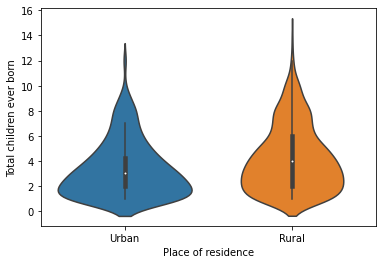

In [257]:
print("Graphic #19")
ax = sns.violinplot(x="Place of residence", y="Total children ever born", data=menopause)

# **Model**

## Predictive model on the susceptibility to get pregnant in 15-19 age group.

### Model Specification

Libraries

In [258]:
import statsmodels.api as sm
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [259]:
Early_preg = pop_15_19.loc[:, ["Region", "Place of residence", "Religion", "Highest educational level", "Wealth index combined", "Having sex", "Knowing ovulatory cycle", "Using method", "Early pregnancy"]]

In [260]:
Early_preg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3307 entries, 0 to 15507
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Region                     3307 non-null   object
 1   Place of residence         3307 non-null   object
 2   Religion                   3307 non-null   object
 3   Highest educational level  3307 non-null   object
 4   Wealth index combined      3307 non-null   object
 5   Having sex                 3307 non-null   object
 6   Knowing ovulatory cycle    3307 non-null   object
 7   Using method               3307 non-null   object
 8   Early pregnancy            3307 non-null   object
dtypes: object(9)
memory usage: 418.4+ KB


In [261]:
 def create_dummies(data = Early_preg, x="var", y="reference modality"):
  b = pd.get_dummies(data[x])
  del b[y]
  return b

df = pd.DataFrame()
for i in range(9):
  modalities = ["Sud", "Rural", "No religion", "Higher", "Middle", "No", "No", "No", "No"]
  cols = Early_preg.columns
  df1 = create_dummies(x=cols[i], y=modalities[i])
  df = pd.concat([df, df1], axis=1)


In [262]:
y = df.iloc[:, -1]
x = df.iloc[:, :-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [263]:
"""scaler = StandardScaler()
scaler.fit(x_train)"""
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=1)
l=classifier.fit(x_train, y_train)

# Predict y data with classifier: 
y_predict = classifier.predict(x_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
len(x_train)


[[563  43]
 [ 42  14]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       606
           1       0.25      0.25      0.25        56

    accuracy                           0.87       662
   macro avg       0.59      0.59      0.59       662
weighted avg       0.87      0.87      0.87       662



2645

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 5)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)
print('After OverSampling : the shape of train_X: {}'.format(x_train_smote.shape))
print('After OverSampling : the shape of train_y: {} \n'.format(y_train_smote.shape))
print("After OverSampling : counts of label '1': {}".format(sum(y_train_smote == 1)))
#print("After OverSampling : counts of label '0': {}".format(sum(y_train_smote == 0))

In [ ]:
import time 
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(x_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(x_test,y_test))
  plot_confusion_matrix(model,x_test,y_test)
  plot_roc_curve(model,x_test,y_test)
df2=pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [266]:
df2

,names,scores,times
0,LogisticRegression,0.912387,0.038545
1,RidgeClassifier,0.915408,0.004726
2,AdaBoostClassifier,0.913897,0.166091
3,GradientBoostingClassifier,0.910876,0.244887
4,RandomForestClassifier,0.898792,0.230818
5,DecisionTreeClassifier,0.898792,0.003303
6,KNeighborsClassifier,0.915408,0.012794


# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?